# Parkinson Data

## Data Analysis


In [21]:
import numpy as np
import audiofile as af
import os as os
from pathlib import Path
import matplotlib.pyplot as plt
import time
import seaborn as sn
from matplotlib import cm as CM
import random
import pandas as pd
import re
import pickle
import itertools
import fnmatch
import seaborn as sns

## Original Dataset - Divided by Speakers

In [22]:
df_segments = pd.DataFrame( np.array([[ 0, 'F' , 0, 0, 0, 0, 'Healthy'], 
                                [ 1, 'F',0, 0 , 0,  0, 'Healthy' ], 
                                [ 3 , 'M',0, 0, 0, 0, 'Healthy'],
                                [ 5,  'F' ,0, 0, 0, 0, 'Healthy' ], 
                                [8, 'F',0, 0, 0, 0, 'Healthy'],
                                [9, 'F',0, 0, 0, 0, 'Healthy'],
                                [10 , 'F',0, 0 , 0, 0, 'Healthy' ], 
                                [ 11, 'F',0, 0 , 0, 0, 'Healthy'],
                                [ 12 , 'F',0, 0 , 0,  0, 'Healthy'],
                                [14, 'F',0, 0, 0, 0, 'Healthy' ],
                                [15, 'M',0, 0 , 0,  0, 'Healthy' ], 
                                [19 , 'F',0, 0, 0, 0, 'Healthy'],
                                [21 ,'F',0, 0, 0, 0, 'Healthy'],
                                [ 22,'F',0, 0, 0, 0, 'Healthy'],
                                [23, 'F',0, 0, 0, 0, 'Healthy'],
                                [25 , 'F',0, 0, 0, 0, 'Healthy' ],
                                [26 , 'F',0, 0, 0, 0, 'Healthy'],
                                [28, 'F',0, 0, 0, 0, 'Healthy'],
                                [ 31,'F',0, 0, 0, 0, 'Healthy'],
                                [35 , 'F',0, 0, 0, 0, 'Healthy'],
                                [36 ,'F',0, 0, 0, 0, 'Healthy'],
                                [ 2, ' M ',2, 1, 0, 0, 'PD'], 
                                [ 4, 'M ',2, 1, 0, 1, 'PD'], 
                                [ 6 , 'M',3, 1, 1, 1 , 'PD'],
                                [ 7, 'M ', 2, 1, 0, 0, 'PD'], 
                                [13,  'M',3, 1, 2, 2, 'PD'],
                                [16,  'F ',2, 1 , 0, 0, 'PD'],
                                [17 , ' F',2, 1, 1,  0, 'PD'], 
                                [18, ' M ',4, 1 , 3, 3 , 'PD'],
                                [20 ,' M ',3, 1, 0, 1, 'PD'],
                                [24,  'M',2, 1 , 0, 0 , 'PD'],
                                [27, ' M ',4,  1 , 1, 1 , 'PD'], 
                                [29 ,  'M',3, 1, 1, 2, 'PD'],
                                [30 ,' F' ,2,1,  1, 1, 'PD'],
                                [32, 'M',3, 1 , 1, 1 , 'PD'],
                                [33, 'M',3, 1, 2, 2, 'PD'],
                                [34 , ' F ',2, 1, 0 ,0 , 'PD']]),                      
         columns = ["id", "gender", "H&Y", 'is_parkinson', "UPDRS_II_5", "UPDRS_III_18", "PD_Status"])

In [23]:
df_segments['id'] = df_segments['id'].astype(int)
df_segments['is_parkinson'] = df_segments['is_parkinson'].astype(int)
df_segments['H&Y'] = df_segments['H&Y'].astype(int)
df_segments['UPDRS_II_5'] = df_segments['UPDRS_II_5'].astype(int)
df_segments['UPDRS_III_18'] = df_segments['UPDRS_III_18'].astype(int)
df_segments.sort_values(by = "id", ignore_index = True, inplace = True)
df_segments['gender'] = df_segments['gender'].apply(lambda s: re.sub('[^a-zA-Z]+', '', s).upper())
df_segments['PD_Status'] = df_segments['PD_Status'].apply(lambda s: re.sub('[^a-zA-Z]+', '', s).upper())

In [24]:
for c in df_segments.columns[3:5]:
    df_segments[c] = df_segments[c].astype(float)
df_segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            37 non-null     int32  
 1   gender        37 non-null     object 
 2   H&Y           37 non-null     int32  
 3   is_parkinson  37 non-null     float64
 4   UPDRS_II_5    37 non-null     float64
 5   UPDRS_III_18  37 non-null     int32  
 6   PD_Status     37 non-null     object 
dtypes: float64(2), int32(3), object(2)
memory usage: 1.7+ KB


In [25]:
len(df_segments[(df_segments.is_parkinson == 1)])

16

In [207]:
df_segments

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status,NEW_PD_CLASS
0,0,F,0,0.0,0.0,0,HEALTHY,HEALTHY
1,1,F,0,0.0,0.0,0,HEALTHY,HEALTHY
2,2,M,2,1.0,0.0,0,PD,PD_1
3,3,M,0,0.0,0.0,0,HEALTHY,HEALTHY
4,4,M,2,1.0,0.0,1,PD,PD_1
5,5,F,0,0.0,0.0,0,HEALTHY,HEALTHY
6,6,M,3,1.0,1.0,1,PD,PD_2
7,7,M,2,1.0,0.0,0,PD,PD_1
8,8,F,0,0.0,0.0,0,HEALTHY,HEALTHY
9,9,F,0,0.0,0.0,0,HEALTHY,HEALTHY


In [27]:
#check gender and pd 
df_segments[(df_segments.gender == 'M') & (df_segments.is_parkinson == 1)] # 12 sick patients for the male case

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status
2,2,M,2,1.0,0.0,0,PD
4,4,M,2,1.0,0.0,1,PD
6,6,M,3,1.0,1.0,1,PD
7,7,M,2,1.0,0.0,0,PD
13,13,M,3,1.0,2.0,2,PD
18,18,M,4,1.0,3.0,3,PD
20,20,M,3,1.0,0.0,1,PD
24,24,M,2,1.0,0.0,0,PD
27,27,M,4,1.0,1.0,1,PD
29,29,M,3,1.0,1.0,2,PD


In [28]:
#check gender and pd 
df_segments[(df_segments.gender == 'F') & (df_segments.is_parkinson == 1)] # 4 sick patients for the female case

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status
16,16,F,2,1.0,0.0,0,PD
17,17,F,2,1.0,1.0,0,PD
30,30,F,2,1.0,1.0,1,PD
34,34,F,2,1.0,0.0,0,PD


In [29]:
#check gender and pd stage
df_segments[(df_segments.gender == 'M') & (df_segments.is_parkinson == 1) & (df_segments.UPDRS_II_5 == 3)]

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status
18,18,M,4,1.0,3.0,3,PD


In [30]:
#check gender and pd stage
df_segments[(df_segments.gender == 'F') & (df_segments.is_parkinson == 1) & (df_segments.UPDRS_II_5 == 1)]

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status
17,17,F,2,1.0,1.0,0,PD
30,30,F,2,1.0,1.0,1,PD


In [31]:
pal_sns = sns.color_palette("coolwarm", 20)
pal_sns

[(0.28527277752941177, 0.38012942263529415, 0.8234685512470589),
 (0.34327752343529416, 0.45935363472941176, 0.8841219216235294),
 (0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.46767809468235294, 0.6055912316235293, 0.9685462810941176),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.7289695795686274, 0.8174641357058824, 0.973187668372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.839351442772549, 0.861166825654902, 0.8944937634156863),
 (0.8918168921215687, 0.8519732770431372, 0.829085274254902),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9563709270509804, 0.7751443261333334, 0.6864159483098039),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.951253794882353, 0.5787993895882353, 0.4594078057647059),
 (0.9244088216823529, 0.49858955783529413, 0.38905901227058826),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885),
 (0.8350272044352941, 0.3136443124235294, 0.25978315174117644),
 (0.7743368501529412, 0.19975926804705882, 0.2025345544352941)]

In [32]:
my_col = [pal_sns[0], pal_sns[10], pal_sns[15], pal_sns[19]]

<ipython-input-33-b7b3c5ed70a6>:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="both", integer=True, tight=True)


<Figure size 720x432 with 0 Axes>

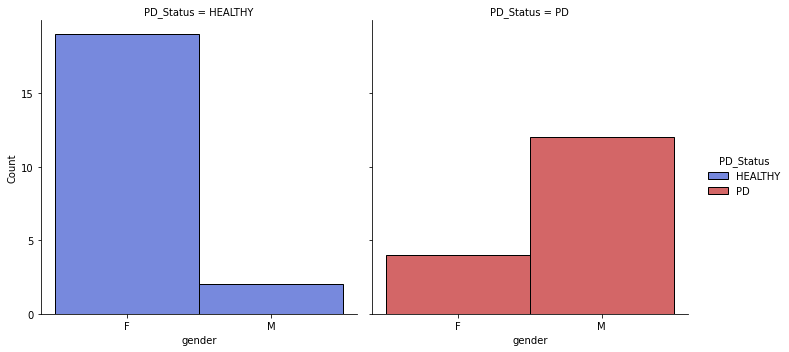

In [33]:
plt.figure(figsize=(10,6))
g = sns.displot(data=df_segments, x="gender", hue="PD_Status",  col="PD_Status", 
                palette=[my_col[0], my_col[3]]) 
plt.locator_params(axis="both", integer=True, tight=True)

plt.show()

<ipython-input-18-01bccc4c28f4>:5: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="both", integer=True, tight=True)


<Figure size 720x432 with 0 Axes>

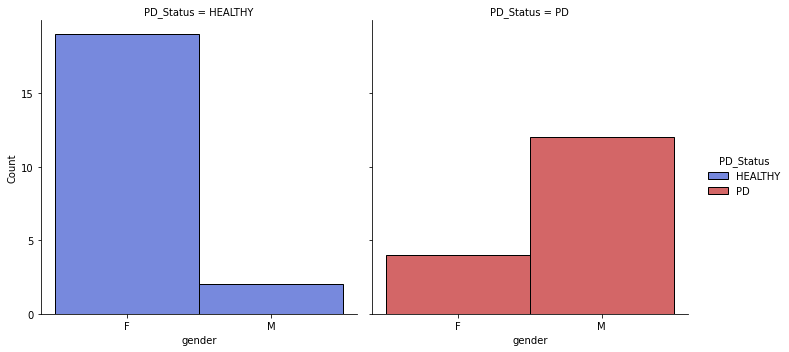

In [18]:
#FOR THE PAPER 
fig1 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_segments, x="gender", hue="PD_Status",  col="PD_Status", 
                palette=[my_col[0], my_col[3]]) 
plt.locator_params(axis="both", integer=True, tight=True)
plt.draw()
plt.savefig("hist_ispd.pdf")
plt.show()


#fig.savefig("hist_ispd.pdf", bbox_inches='tight')

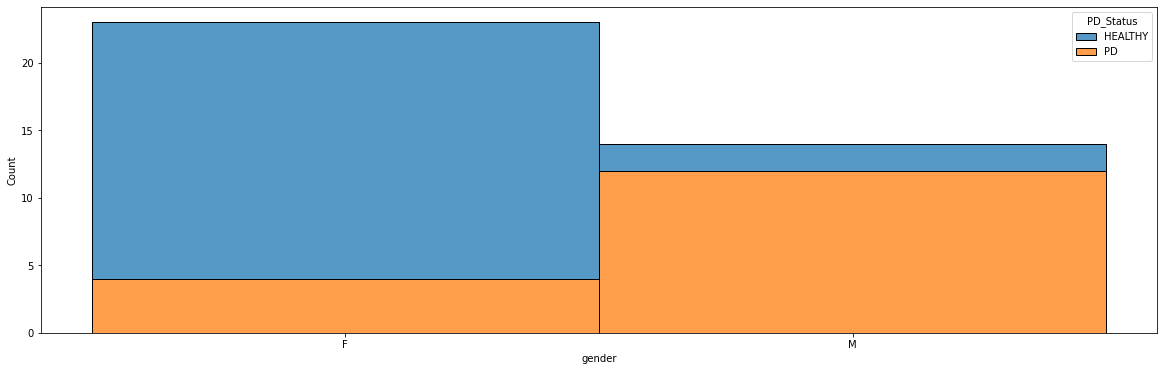

In [110]:
#FOR THE PAPER - substituted
#fig = plt.figure(figsize=(20,6))
#g = sns.histplot(data=df_segments, x="gender", hue="PD_Status",multiple="stack",bins = 20)
#plt.show()

#fig.savefig("hist_ispd.pdf", bbox_inches='tight')

In [ ]:
##############################
#check only the sick patients#
##############################

In [34]:
df_seg_is_pd_1 = df_segments[(df_segments.is_parkinson == 1)]
df_seg_is_pd_1 = df_seg_is_pd_1.reset_index()

In [35]:
df_seg_is_pd_1

,index,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status
0,2,2,M,2,1.0,0.0,0,PD
1,4,4,M,2,1.0,0.0,1,PD
2,6,6,M,3,1.0,1.0,1,PD
3,7,7,M,2,1.0,0.0,0,PD
4,13,13,M,3,1.0,2.0,2,PD
5,16,16,F,2,1.0,0.0,0,PD
6,17,17,F,2,1.0,1.0,0,PD
7,18,18,M,4,1.0,3.0,3,PD
8,20,20,M,3,1.0,0.0,1,PD
9,24,24,M,2,1.0,0.0,0,PD


In [36]:
# create a list of our conditions
conditions = [
    (df_seg_is_pd_1['UPDRS_II_5'] == 0.0),
    (df_seg_is_pd_1['UPDRS_II_5'] != 0.0) 
    ]

# create a list of the values we want to assign for each condition
values = [0, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_is_pd_1['New_PD_class'] = np.select(conditions, values)

In [168]:
df_seg_is_pd_1

,index,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status,NEW_PD_CLASS,New_PD_class
0,2,2,M,2,1.0,0.0,0.0,PD,PD_1,0
1,4,4,M,2,1.0,0.0,1.0,PD,PD_1,0
2,6,6,M,3,1.0,1.0,1.0,PD,PD_2,1
3,7,7,M,2,1.0,0.0,0.0,PD,PD_1,0
4,13,13,M,3,1.0,2.0,2.0,PD,PD_2,1
5,16,16,F,2,1.0,0.0,0.0,PD,PD_1,0
6,17,17,F,2,1.0,1.0,0.0,PD,PD_2,1
7,18,18,M,4,1.0,3.0,3.0,PD,PD_2,1
8,20,20,M,3,1.0,0.0,1.0,PD,PD_1,0
9,24,24,M,2,1.0,0.0,0.0,PD,PD_1,0


In [37]:
pal_sns = sns.color_palette("coolwarm", 50)
pal_sns

[(0.2526625972549019, 0.3328367876470588, 0.7836650259411765),
 (0.27582712294117645, 0.36671691552941177, 0.812552935372549),
 (0.2994412594117647, 0.40024818329411765, 0.8398419750588235),
 (0.32371841525490197, 0.4331584405490196, 0.864722355372549),
 (0.34832334141176474, 0.4657111465098039, 0.8883461629411764),
 (0.37355243129411764, 0.4974987054117647, 0.9094673695294118),
 (0.39923148431372546, 0.5285284721568628, 0.9284591027843138),
 (0.42519897019607844, 0.559058179764706, 0.9460614570784314),
 (0.4517385604705882, 0.5881809882352941, 0.9602012675882352),
 (0.4784622512941176, 0.6165636436078431, 0.9727208954313725),
 (0.5054226428235293, 0.6439946735686275, 0.9831574312745098),
 (0.5325682374117646, 0.6698005978823529, 0.9903932701176471),
 (0.5597467255686274, 0.6947677280784313, 0.9960753091764706),
 (0.5869210038431373, 0.7181213123921568, 0.9988741138823529),
 (0.6139326527647059, 0.7399229822941177, 0.9991423720588235),
 (0.640827782372549, 0.7607515064117647, 0.9978457748823529),
 (0.6672529243333334, 0.7791764569999999, 0.992959213),
 (0.6933212848235294, 0.7963141317058823, 0.9863077805294118),
 (0.7189852929803922, 0.811992893745098, 0.9776561613921568),
 (0.743754202627451, 0.8251253648823529, 0.9657977615490196),
 (0.7680343643529411, 0.8370352195294117, 0.9524882182352941),
 (0.7913922856078431, 0.8467502080784314, 0.9366409266274509),
 (0.8136925818823529, 0.8542818385490196, 0.9184801025098039),
 (0.8353447113529412, 0.8605139972941176, 0.8989704099411765),
 (0.8553783684509804, 0.8637781390980391, 0.8765871773137255),
 (0.8755573874313726, 0.860242158862745, 0.8514300660980393),
 (0.8958817682941177, 0.8499060565882353, 0.8234990762941177),
 (0.9127650614705882, 0.8366818943529412, 0.7945121117647058),
 (0.9281160096666666, 0.8221971488627451, 0.765141349254902),
 (0.940878943, 0.8055964028235294, 0.7351665564705883),
 (0.9509556129803922, 0.7868750333333333, 0.7047606828039216),
 (0.9595176584705882, 0.7669728545098039, 0.6741447150392157),
 (0.9648353582352941, 0.7446136745882352, 0.6432388753529412),
 (0.968203399, 0.7208441, 0.6122929913333334),
 (0.9698511524117647, 0.6958300595294117, 0.5813117740784314),
 (0.968105337, 0.6684751961176472, 0.5504862209411766),
 (0.9649113881372549, 0.6401590780588234, 0.5198055987058824),
 (0.9593847296274509, 0.6103057604117648, 0.4893818509411765),
 (0.951253794882353, 0.5787993895882353, 0.4594078057647059),
 (0.9417279298235294, 0.5464134770196079, 0.429707070372549),
 (0.9293571382941177, 0.512253534745098, 0.40067274315686274),
 (0.9151571239411764, 0.4769265271764706, 0.3721794147647059),
 (0.8995343807254902, 0.4406918021568627, 0.34410686323529416),
 (0.8808963866470588, 0.4023312782745098, 0.3171151874901961),
 (0.8610536002941176, 0.3629157635294118, 0.2906281271764706),
 (0.8393649370784314, 0.32185622094117644, 0.26492398098039216),
 (0.8155083866078432, 0.2777809871764706, 0.24029356566666665),
 (0.7905615319411765, 0.23139699905882352, 0.21624203829411764),
 (0.763520395627451, 0.17866744737254903, 0.1933962318627451),
 (0.7350766252941177, 0.10445963105882351, 0.17149230125490195)]

In [38]:
my_col = [pal_sns[30], pal_sns[35], pal_sns[40], pal_sns[49]]

<Figure size 720x432 with 0 Axes>

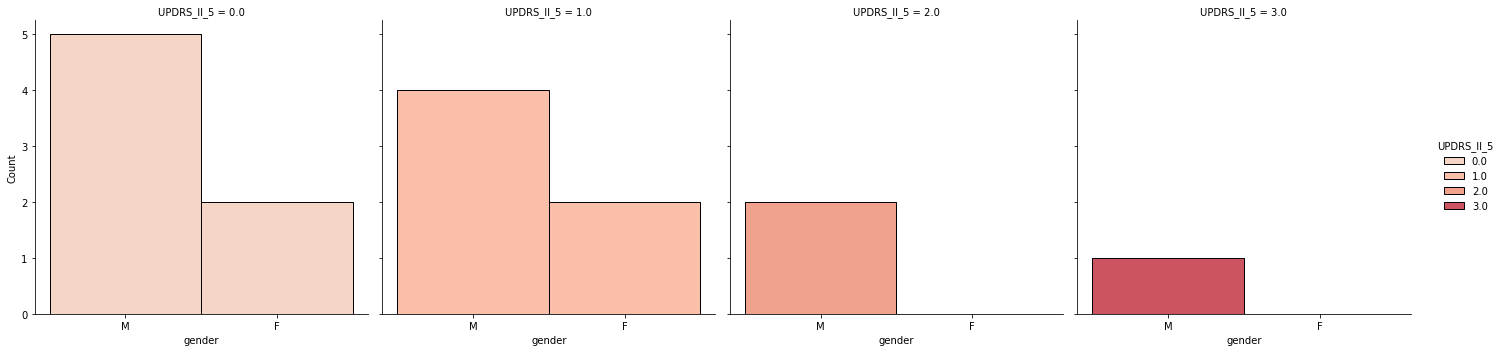

In [39]:
plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_is_pd_1, x="gender", hue="UPDRS_II_5",  col="UPDRS_II_5", palette= my_col)
plt.show()

<ipython-input-189-faaf65bb67cb>:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="both", integer=True, tight=True)


<Figure size 720x432 with 0 Axes>

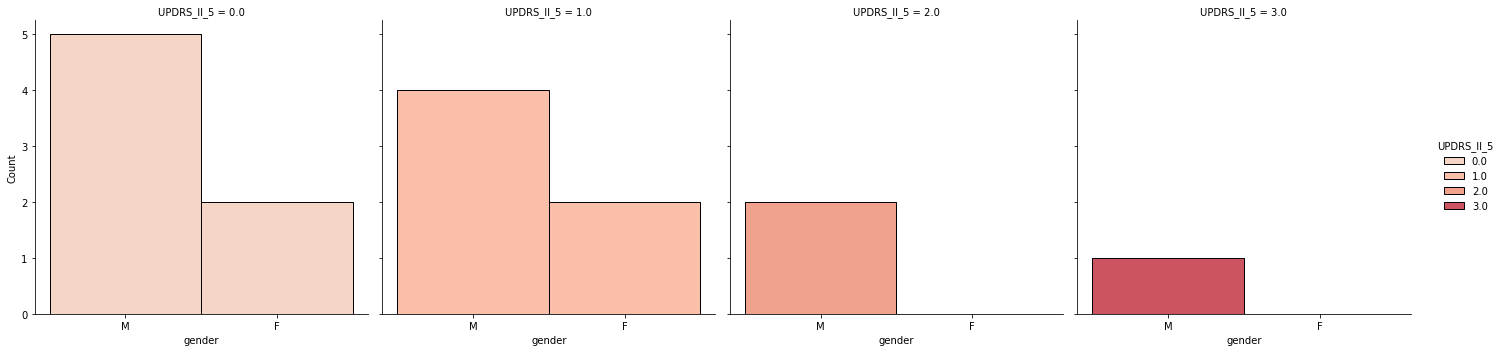

In [189]:
#FOR THE PAPER 
fig2 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_is_pd_1, x="gender", hue="UPDRS_II_5",  col="UPDRS_II_5", palette= my_col)
plt.locator_params(axis="both", integer=True, tight=True)
plt.draw()
plt.savefig("hist_ispd.pdf")
plt.show()


#fig.savefig("hist_ispd.pdf", bbox_inches='tight')

In [40]:
# create a list of our conditions
conditions = [
    (df_segments['UPDRS_II_5'] == 0.0) & (df_segments['is_parkinson'] == 1),
    (df_segments['UPDRS_II_5'] != 0.0) & (df_segments['is_parkinson'] == 1),
    (df_segments['is_parkinson'] == 0)
    ]

# create a list of the values we want to assign for each condition
values = ['PD_1', 'PD_2', 'HEALTHY']

# create a new column and use np.select to assign values to it using our lists as arguments
df_segments['NEW_PD_CLASS'] = np.select(conditions, values)

In [41]:
df_segments

,id,gender,H&Y,is_parkinson,UPDRS_II_5,UPDRS_III_18,PD_Status,NEW_PD_CLASS
0,0,F,0,0.0,0.0,0,HEALTHY,HEALTHY
1,1,F,0,0.0,0.0,0,HEALTHY,HEALTHY
2,2,M,2,1.0,0.0,0,PD,PD_1
3,3,M,0,0.0,0.0,0,HEALTHY,HEALTHY
4,4,M,2,1.0,0.0,1,PD,PD_1
5,5,F,0,0.0,0.0,0,HEALTHY,HEALTHY
6,6,M,3,1.0,1.0,1,PD,PD_2
7,7,M,2,1.0,0.0,0,PD,PD_1
8,8,F,0,0.0,0.0,0,HEALTHY,HEALTHY
9,9,F,0,0.0,0.0,0,HEALTHY,HEALTHY


In [42]:
pal_sns = sns.color_palette("coolwarm", 20)
pal_sns

my_col = [pal_sns[0], pal_sns[10], pal_sns[15], pal_sns[19]]

<Figure size 720x432 with 0 Axes>

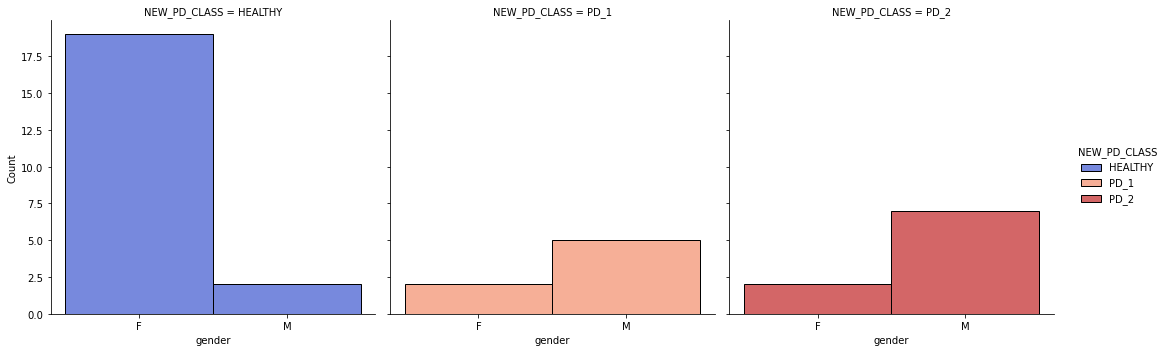

In [43]:
plt.figure(figsize=(10,6))
g = sns.displot(data=df_segments, x="gender", hue="NEW_PD_CLASS",  col="NEW_PD_CLASS", palette=[my_col[0],my_col[2], my_col[3]])
plt.show()

<ipython-input-178-00ce75d0b987>:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis="both", integer=True, tight=True)


<Figure size 720x432 with 0 Axes>

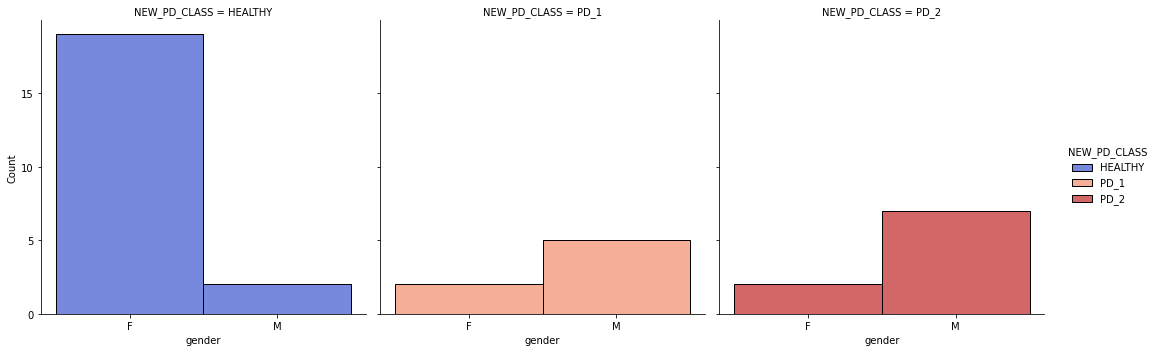

In [178]:
#FOR THE PAPER 
fig3 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_segments, x="gender", hue="NEW_PD_CLASS",  col="NEW_PD_CLASS", palette=[my_col[0],my_col[2], my_col[3]])
plt.locator_params(axis="both", integer=True, tight=True)
plt.draw()
plt.savefig("hist_ispd_newstages.pdf")
plt.show()


#fig.savefig("hist_ispd.pdf", bbox_inches='tight')

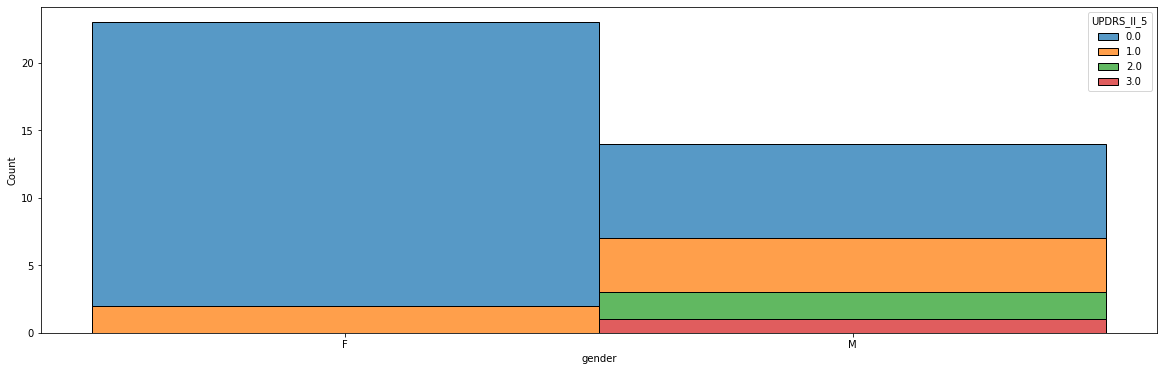

In [34]:
#FOR THE PAPER - substituted
#fig = plt.figure(figsize=(20,6))
#g = sns.histplot(data=df_segments, x="gender", hue="UPDRS_II_5",multiple="stack",bins = 20, palette=["C0", "C1","C2", "C3"])
#plt.show()

#fig.savefig("hist_ispd_stages.pdf", bbox_inches='tight')

## Segments 

In [303]:
################
#Index Patients#
################

########
#FEMALE#
########
final_index_pt_f_hc_train = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pt_f_hc_train.npy')
final_index_pt_f_pd_train = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pt_f_pd_train.npy')

######
#MALE#
######

final_index_pt_m_hc_train = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pt_m_hc_train.npy')
final_index_pt_m_pd_train = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pt_m_pd_train.npy')


In [304]:
#######################
#Index Parkinson Stage#
#######################

########
#FEMALE#
########

final_index_pd_f = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pd_f.npy')

######
#MALE#
######

final_index_pd_m = np.load('C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\System_M1\\Code\\final_index_pd_m.npy')


In [305]:
df_seg_descr_m = pd.DataFrame([final_index_pd_m, final_index_pt_m_pd_train] ).T
df_seg_descr_m.columns = ['PD_stage','Patient_N']
df_seg_descr_m

,PD_stage,Patient_N
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
7989,2,11
7990,2,11
7991,2,11
7992,2,11


In [306]:
df_seg_descr_f = pd.DataFrame([final_index_pd_f, final_index_pt_f_pd_train] ).T
df_seg_descr_f.columns = ['PD_stage','Patient_N']
df_seg_descr_f

,PD_stage,Patient_N
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2747,0,3
2748,0,3
2749,0,3
2750,0,3


In [307]:
pd_df_m_seg = df_seg_descr_m.groupby(['PD_stage','Patient_N',])['PD_stage'].count()
pd_df_m_seg = pd.DataFrame(pd_df_m_seg)
pd_df_m_seg

PD_stage
PD_stage Patient_N          
0        0               999
         1               530
         3               832
         6               771
         7               778
1        2               976
         8               407
         9               740
         10              372
2        4               401
         11              649
3        5               539

In [308]:
pd_df_f_seg = df_seg_descr_f.groupby(['PD_stage','Patient_N'])['PD_stage'].count()
pd_df_f_seg = pd.DataFrame(pd_df_f_seg)
pd_df_f_seg

PD_stage
PD_stage Patient_N          
0        0               864
         3               679
1        1               449
         2               760

In [309]:
df_seg_descr_f

,PD_stage,Patient_N
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2747,0,3
2748,0,3
2749,0,3
2750,0,3


In [310]:
# create a list of our conditions
conditions = [
    (df_seg_descr_f['PD_stage'] == 0),
    (df_seg_descr_f['PD_stage'] == 1)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1']

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_f['UPDRS_II_5 Stage'] = np.select(conditions, values)

<Figure size 720x432 with 0 Axes>

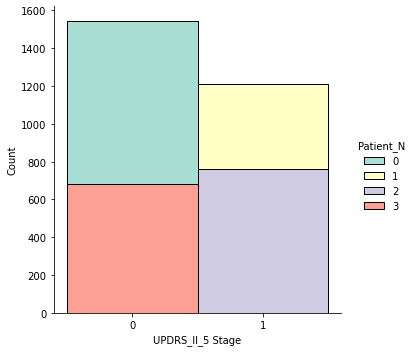

In [311]:
fig4 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_descr_f, x="UPDRS_II_5 Stage", hue="Patient_N", multiple="stack", 
                palette="Set3", bins = 2)

plt.draw()

plt.show()

In [312]:
# create a list of our conditions
conditions = [
    (df_seg_descr_m['PD_stage'] == 0),
    (df_seg_descr_m['PD_stage'] == 1),
    (df_seg_descr_m['PD_stage'] == 2),
    (df_seg_descr_m['PD_stage'] == 3)
    ]

# create a list of the values we want to assign for each condition
values = ['0', '1', '2', '3']

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_m['UPDRS_II_5 Stage'] = np.select(conditions, values)

<Figure size 720x432 with 0 Axes>

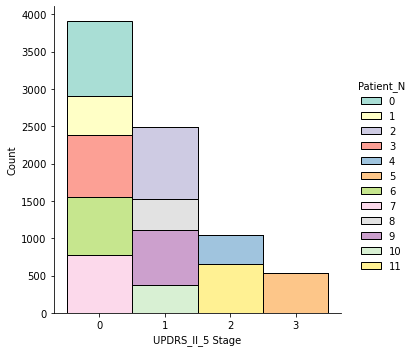

In [313]:
fig5 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_descr_m, x="UPDRS_II_5 Stage", hue="Patient_N", multiple="stack", 
                palette="Set3", bins = 4)

plt.draw()

plt.show()

In [314]:
#################
#    FEMALE     #
#################

df_seg_descr_hc_f = pd.DataFrame([ final_index_pt_f_hc_train] ).T
df_seg_descr_hc_f.columns = ['Patient_N']
df_seg_descr_hc_f



,Patient_N
0,0
1,0
2,0
3,0
4,0
...,...
15474,18
15475,18
15476,18
15477,18


In [315]:
df_seg_descr_hc_f['Parkinson Stage'] = 0
df_seg_descr_hc_f['PD_stage'] = 0

In [316]:
# create a list of our conditions
conditions = [
    (df_seg_descr_hc_f['Parkinson Stage'] == 0),
    ]

# create a list of the values we want to assign for each condition
values = ['HEALTHY']

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_hc_f['UPDRS_II_5 Stage'] = np.select(conditions, values)

In [317]:
len(df_segments[(df_segments.gender == 'F')])

23

In [318]:
df_seg_descr_f

,PD_stage,Patient_N,UPDRS_II_5 Stage
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
2747,0,3,0
2748,0,3,0
2749,0,3,0
2750,0,3,0


In [322]:
df_seg_descr_hc_f

,Patient_N,Parkinson Stage,PD_stage,UPDRS_II_5 Stage
0,0,0,0,HEALTHY
1,0,0,0,HEALTHY
2,0,0,0,HEALTHY
3,0,0,0,HEALTHY
4,0,0,0,HEALTHY
...,...,...,...,...
15474,18,0,0,HEALTHY
15475,18,0,0,HEALTHY
15476,18,0,0,HEALTHY
15477,18,0,0,HEALTHY


In [323]:
set(df_seg_descr_hc_f['Patient_N'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [324]:
set(df_seg_descr_f['Patient_N'])

{0, 1, 2, 3}

In [325]:
# create a list of our conditions
conditions = [
    (df_seg_descr_f['Patient_N'] == 0),
    (df_seg_descr_f['Patient_N'] == 1),
    (df_seg_descr_f['Patient_N'] == 2),
    (df_seg_descr_f['Patient_N'] == 3)
    ]

# create a list of the values we want to assign for each condition
values = [19,20,21,22]

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_f['Patient_N_2'] = np.select(conditions, values)

In [326]:
df_seg_descr_hc_f['Patient_N_2'] = df_seg_descr_hc_f['Patient_N']

In [327]:
df_seg_descr_hc_f = df_seg_descr_hc_f[df_seg_descr_f.columns]

In [328]:
df_seg_f = pd.concat([df_seg_descr_hc_f, df_seg_descr_f])

In [329]:
df_seg_f

,PD_stage,Patient_N,UPDRS_II_5 Stage,Patient_N_2
0,0,0,HEALTHY,0
1,0,0,HEALTHY,0
2,0,0,HEALTHY,0
3,0,0,HEALTHY,0
4,0,0,HEALTHY,0
...,...,...,...,...
2747,0,3,0,22
2748,0,3,0,22
2749,0,3,0,22
2750,0,3,0,22


<Figure size 720x432 with 0 Axes>

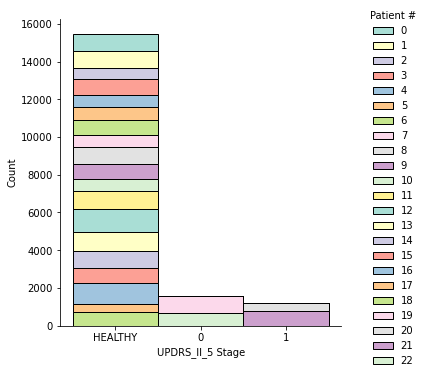

In [362]:
fig6 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_f, x="UPDRS_II_5 Stage", hue="Patient_N_2", multiple="stack", 
                palette="Set3")
new_title = 'Patient #'
g._legend.set_title(new_title)


plt.draw()

plt.show()

<Figure size 720x432 with 0 Axes>

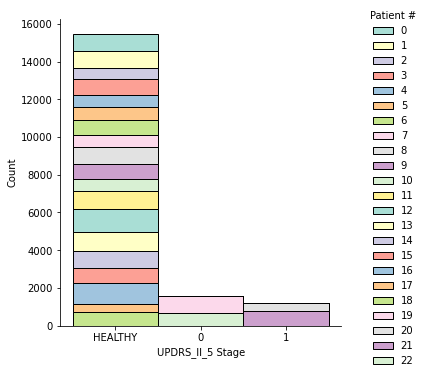

In [363]:
#FOR THE PAPER
fig6 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_f, x="UPDRS_II_5 Stage", hue="Patient_N_2", multiple="stack", 
                palette="Set3", bins = 4)
new_title = 'Patient #'
g._legend.set_title(new_title)

plt.draw()
plt.savefig("hist_df_seg_f.pdf")

plt.show()

In [346]:
###############
#    MALE     #
###############

df_seg_descr_hc_m = pd.DataFrame([ final_index_pt_m_hc_train] ).T
df_seg_descr_hc_m.columns = ['Patient_N']
df_seg_descr_hc_m

,Patient_N
0,0
1,0
2,0
3,0
4,0
...,...
1727,1
1728,1
1729,1
1730,1


In [347]:
df_seg_descr_hc_m['PD_stage'] = 0

In [348]:
# create a list of our conditions
conditions = [
    (df_seg_descr_hc_m['PD_stage'] == 0),
    ]

# create a list of the values we want to assign for each condition
values = ['HEALTHY']

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_hc_m['UPDRS_II_5 Stage'] = np.select(conditions, values)

In [349]:
df_seg_descr_m

,PD_stage,Patient_N,UPDRS_II_5 Stage,Patient_N_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
7989,2,11,2,11
7990,2,11,2,11
7991,2,11,2,11
7992,2,11,2,11


In [350]:
set(df_seg_descr_hc_m['Patient_N'])

{0, 1}

In [351]:
set(df_seg_descr_m['Patient_N'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [352]:
# create a list of our conditions
conditions = [
    (df_seg_descr_hc_m['Patient_N'] == 0),
    (df_seg_descr_hc_m['Patient_N'] == 1)
    ]

# create a list of the values we want to assign for each condition
values = [12,13]

# create a new column and use np.select to assign values to it using our lists as arguments
df_seg_descr_hc_m['Patient_N_2'] = np.select(conditions, values)

In [353]:
df_seg_descr_hc_m

,Patient_N,PD_stage,UPDRS_II_5 Stage,Patient_N_2
0,0,0,HEALTHY,12
1,0,0,HEALTHY,12
2,0,0,HEALTHY,12
3,0,0,HEALTHY,12
4,0,0,HEALTHY,12
...,...,...,...,...
1727,1,0,HEALTHY,13
1728,1,0,HEALTHY,13
1729,1,0,HEALTHY,13
1730,1,0,HEALTHY,13


In [354]:
df_seg_descr_m['Patient_N_2'] = df_seg_descr_m['Patient_N']

In [355]:
df_seg_descr_m

,PD_stage,Patient_N,UPDRS_II_5 Stage,Patient_N_2
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
7989,2,11,2,11
7990,2,11,2,11
7991,2,11,2,11
7992,2,11,2,11


In [356]:
df_seg_descr_m = df_seg_descr_m[df_seg_descr_hc_m.columns]

In [357]:
df_seg_m = pd.concat([df_seg_descr_hc_m, df_seg_descr_m])

<Figure size 720x432 with 0 Axes>

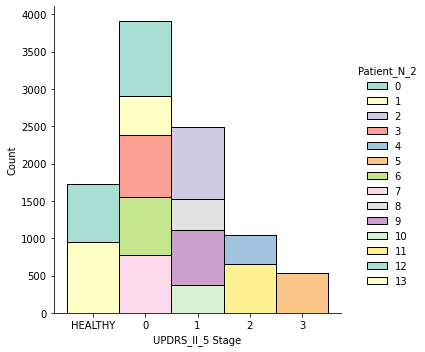

In [359]:
fig7 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_m, x="UPDRS_II_5 Stage", hue="Patient_N_2", multiple="stack", 
                palette="Set3", bins = 4)

plt.draw()

plt.show()

<Figure size 720x432 with 0 Axes>

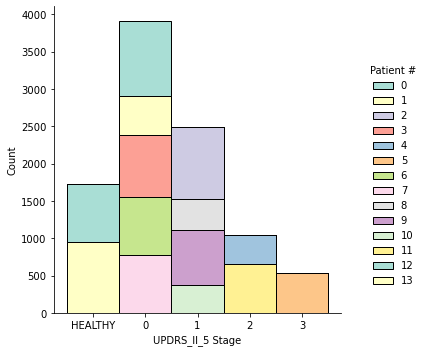

In [364]:
#FOR THE PAPER
fig7 = plt.figure(figsize=(10,6))
g = sns.displot(data=df_seg_m, x="UPDRS_II_5 Stage", hue="Patient_N_2", multiple="stack", 
                palette="Set3", bins = 4)

new_title = 'Patient #'
g._legend.set_title(new_title)


plt.draw()
plt.savefig("hist_df_seg_m.pdf")

plt.show()

### Male

In [45]:
X_train_hc_m = np.load ( 'C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\OLD_Training_Testing\\X_train_hc_m.npy')

In [47]:
X_train_m_pd_split = np.load ( 'C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\OLD_Training_Testing\\X_train_m_pd_split.npy',
                             allow_pickle=True)


In [67]:
n_seg_hc_m = len(X_train_hc_m)

In [68]:
n_seg_pd_m = [len(X_train_m_pd_split[i]) for i in range(0,len(X_train_m_pd_split))]

In [69]:
n_seg = n_seg_pd_m
n_seg.insert(0, n_seg_hc_m)

In [87]:
patient_status = [ 'HEALTHY', 'PD_0', 'PD_1','PD_2', 'PD_3']

In [88]:
df_m = pd.DataFrame([patient_status, n_seg]).T

In [93]:
df_m.columns = ['Patient Status','# Segments']

In [94]:
df_m

,Patient Status,# Segments
0,Healthy,1732
1,PD_0,3910
2,PD_1,2495
3,PD_2,1050
4,PD_3,539


In [95]:
df_m_1 = df_m.set_index('Patient Status') 

<AxesSubplot:xlabel='Patient Status'>

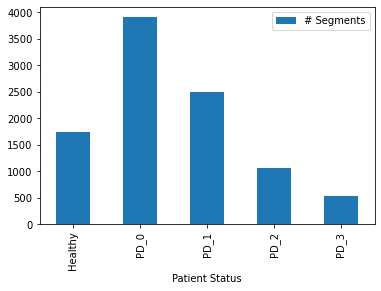

In [96]:
df_m_1.plot( kind='bar')

### Female

In [97]:
X_train_hc_f = np.load ( 'C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\OLD_Training_Testing\\X_train_hc_f.npy')

In [98]:
X_train_f_pd_split = np.load ( 'C:\\Users\\Marta\\Desktop\\Parkinson_data\\Python_code\\Data_extraction_&_preliminaries\\Results\\OLD_Training_Testing\\X_train_f_pd_split.npy',
                             allow_pickle=True)


In [131]:
n_seg_hc_f = len(X_train_hc_f)

In [132]:
n_seg_pd_f = [len(X_train_f_pd_split[i]) for i in range(0,len(X_train_f_pd_split))]

In [133]:
n_seg = n_seg_pd_f
n_seg.insert(0, n_seg_hc_f)

In [134]:
patient_status = [ 'HEALTHY', 'PD_0', 'PD_1','PD_2', 'PD_3']

In [135]:
df_f = pd.DataFrame([patient_status, n_seg]).T

In [136]:
df_f.columns = ['Patient Status','# Segments - Female']

In [137]:
df_f = df_f.set_index('Patient Status') 

In [144]:
df_f

,# Segments - Female
Patient Status,
HEALTHY,15479
PD_0,1543
PD_1,1209
PD_2,None
PD_3,None


<AxesSubplot:xlabel='Patient Status'>

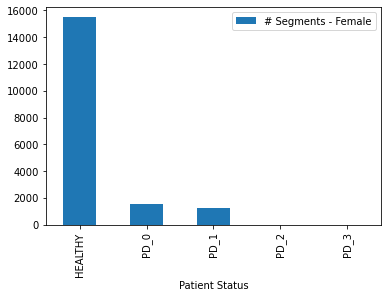

In [143]:
df_f.plot( kind='bar')